# Clustering  

* Hard Clustering (yes or no)
    * Each point is assigned to only the nearest centeroid (all or nothing)

* Soft Clustering (probabilities)
    * Each point is given a score toward each centeroid. (like a 60% vs 40% split)
    * Examples:
        * Normalized distance between the point and all centeroids (like a number between 0 and 1)
        * Similarity score (ak affinity) 
            * Example: Gaussian Radial Basis Function (like the RBF Kernal in SVMS)
            * Similatiry score question $\phi_\gamma(\vec{x}, L) = \exp \left (-\gamma || \vec {x} - L || ^2 \right)$

# Clustering Example

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [123]:
X,y = make_blobs(
    n_samples=100,
    n_features=2,   # 2d just x and y
    centers=4,      # MAKE FOUR clusters
    cluster_std=1.8,
    random_state=50
)

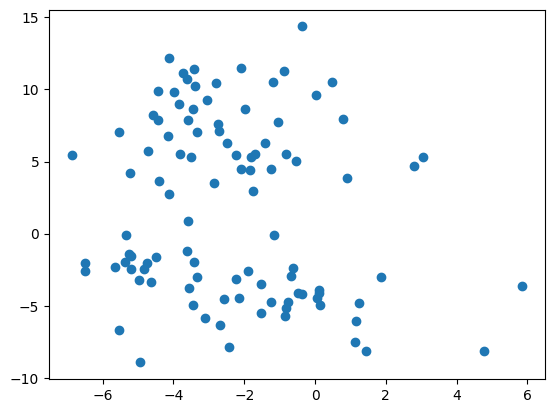

In [124]:
plt.scatter(X[:,0], X[:,1])

In [125]:
from sklearn.cluster import KMeans

k = 4

kmeans = KMeans(n_clusters=k, random_state=30, n_init='auto')  # n_init is how many models you want to make. "3" would create three different models and go through the process three times
kmeans.fit(X)       # creates points, and assigns points to cluster

# goal for clustering is to minimize distance between a point and it's centeroid
# and to maximize distance between clusters  

X_distances = kmeans.transform(X)   # gives the distances between x and each centeroid

print(X_distances[:10,:])

[[ 0.11441977 10.79612714  4.89629504 15.5634825 ]
 [ 0.52254457 10.35913692  4.65290513 15.12581283]
 [ 2.74555377  8.12575011  3.68469427 12.90652447]
 [12.53232955  2.15904422  9.5863742   3.91008606]
 [ 5.86589586 12.6810365   4.09660138 17.33014666]
 [ 4.99757401  9.22880325  0.67291788 13.89759375]
 [15.35313218  4.51325607 12.60377577  1.44936333]
 [13.33320901  3.5038965   9.96783641  4.38385198]
 [ 5.93926953 12.36727622 10.16480896 16.42256914]
 [11.42510505  1.21528178  9.56103418  4.26059762]]


# WCSS and the Elbow Method

**WCSS**: Within-Cluster Sum of Squares. Find the sum of square errors PER CLUSTER, then add them all up  

Each cluster:
$$ \sum(x - \mu)^2$$  

Total for all k clusters:

$$WCSS = \sum_{i=1}^k\sum_{x\in C_i} (x - \mu)^2$$  

In the KMeans model, the `kmeans.inertia_` attribute gives the WCSS

In [126]:
print("Inertia of kmeans model: ", kmeans.inertia_)

Inertia of kmeans model:  614.3583731459585


* Loop through different values of $k$, then plot the WCSS results.

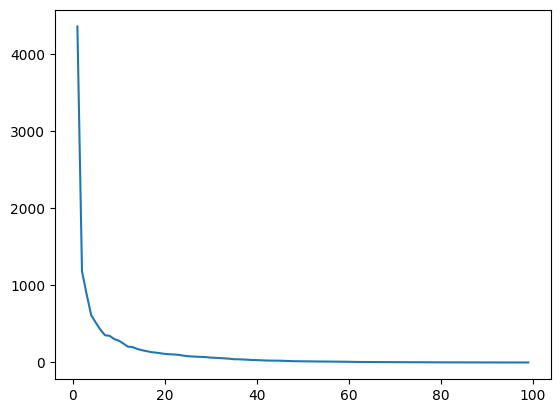

In [127]:
import math
num_clusters = []
wcss = []

for k in range(1, 100):
    kmeans = KMeans(n_clusters=k, random_state=30, n_init='auto')
    kmeans.fit(X)
    num_clusters.append(k)
    wcss.append(kmeans.inertia_)

plt.plot((num_clusters), wcss)

## Number guessing game!

* create a random number o groups

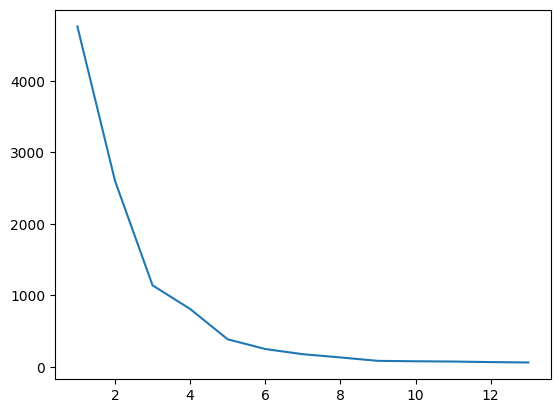

In [128]:
rnd_num = np.random.randint(2, 10)

X,y = make_blobs(
    n_samples=100,
    n_features=2,           # 2d just x and y
    centers=rnd_num,        # MAKE FOUR clusters
    cluster_std=0.7,
    random_state=99
)


# create kmeans models 
# calculate wcss
num_clusters = []
wcss = []

for k in range(1, 14):
    kmeans = KMeans(n_clusters=k, random_state=30, n_init='auto')
    kmeans.fit(X)
    num_clusters.append(k)
    wcss.append(kmeans.inertia_)

plt.plot((num_clusters), wcss)

In [129]:
rnd_num

9

# The Silhouette Index (-1, 1)

**Silhouette Score** or **Coefficient**  

$$s(x) = \frac{b(x)-a(x)}{\max\{a(x), b(x)\}}$$

* $a(x)* is the average distance between point x and all other points in the cluster

* $b(x)$ is the min avg dist from x to all points in other clusters   

Index will always be between (-1 and 1). 
* +1 means x is close to it's cluster and far from other clusters
* 0 means x is close to the boundary between clusters
* -1 means x is not close to its cluster and is closer to other clusters (miss classified?)

silhouette index for model is average s(x) for whole model

In [130]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

np.float64(0.5149190772927282)

For more info, look up
scikit-learn.org silhouette analysis : Selecting the number of clusters